<a href="https://www.kaggle.com/code/kilianandy/notebook108934421c?scriptVersionId=101689045" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
nasa = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')
nasa.shape

(90836, 10)

In [3]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
# Dropping columns that have only one unique entity.
nasa.drop(columns= ['orbiting_body', 'sentry_object'], inplace= True)

In [5]:
# Checking of there are any duplicated records in the dataset
nasa.duplicated().sum()

0

In [6]:
# Changing the id column entries from integers to string to prevent them from being described.
nasa['id'] = nasa.id.astype(str)
nasa.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


## Univariate Plots of Numeric Type Data

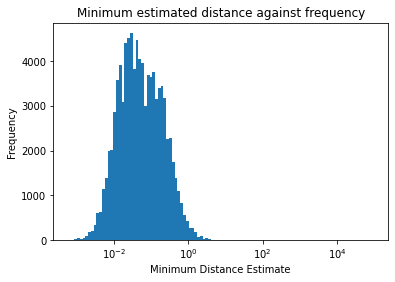

In [7]:
# Importing the various libraries needed for plotting.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plotting a Histogram of minimum estimated distance using log scale transformation on the x axis.
x = np.log10(nasa.est_diameter_min.describe())
bins = 10 ** np.arange(x.min(), x.max()+0.075, 0.075)
plt.hist(data= nasa, x= 'est_diameter_min', bins= bins)
plt.xlabel('Minimum Distance Estimate')
plt.ylabel('Frequency')
plt.xscale('log')
plt.title('Minimum estimated distance against frequency');

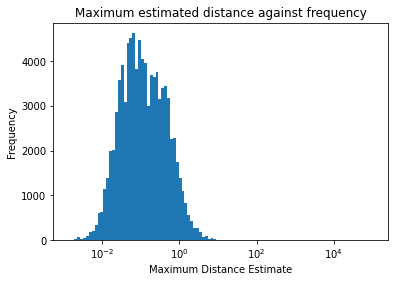

In [8]:
# Plotting a Histogram of maximum estimated distance using log scale transformation on the x axis.
x = np.log10(nasa.est_diameter_max.describe())
bins = 10 ** np.arange(x.min(), x.max()+0.075, 0.075)
plt.hist(data= nasa, x= 'est_diameter_max', bins= bins)
plt.xlabel('Maximum Distance Estimate')
plt.ylabel('Frequency')
plt.xscale('log')
plt.title('Maximum estimated distance against frequency');

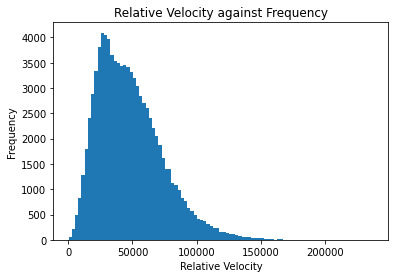

In [9]:
bins = np.arange(nasa.relative_velocity.min(), nasa.relative_velocity.max()+2500, 2500)
plt.hist(data= nasa, x= 'relative_velocity', bins= bins)
plt.xlabel('Relative Velocity')
plt.ylabel('Frequency')
plt.title('Relative Velocity against Frequency');

The plot above shows that the relative velocity of the asteroids is skewed to the right meaning that the mean and the mode have a significant difference.

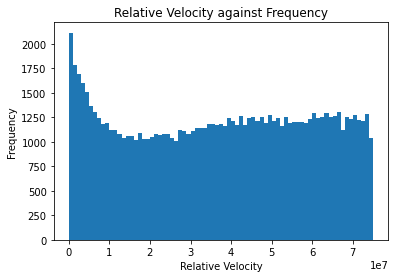

In [10]:
bins = np.arange(nasa.miss_distance.min(), nasa.miss_distance.max()+1000000, 1000000)
plt.hist(data= nasa, x= 'miss_distance', bins= bins)
plt.xlabel('Relative Velocity')
plt.ylabel('Frequency')
plt.title('Relative Velocity against Frequency');

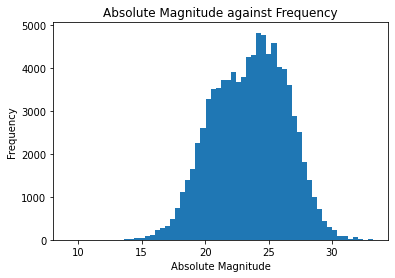

In [11]:
bins = np.arange(nasa.absolute_magnitude.min(), nasa.absolute_magnitude.max()+0.4, 0.4)
plt.hist(data= nasa, x= 'absolute_magnitude', bins= bins)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.title('Absolute Magnitude against Frequency');

A majority of the asteroids have an absolute magnitude of 20-27.

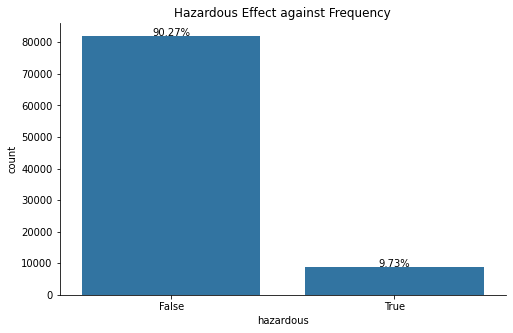

In [12]:
# A bar graph showing how hazardous the asteroids could be.
ax = plt.figure(figsize= (8, 5)).subplots()
base_color = sns.color_palette()[0]
sns.countplot(data= nasa, x= 'hazardous', color= base_color);
ax.spines[['top', 'right']].set_visible(False)

locs, labels = plt.xticks()

nasa['hazardous'] = nasa.hazardous.astype(str)
x = nasa.hazardous.value_counts()
for loc, label in zip(locs, labels):
    count = x[label.get_text()]
    percentage = '{:.2f}%'.format((count * 100) / x.sum())
    plt.text(loc, count, percentage, ha= 'center', va= 'baseline')
    
plt.title('Hazardous Effect against Frequency');

The plot above shows the hazardous effect of the asteroid by percentage. The majority of the asteroid are not hazardous.

## Bivariate Plots

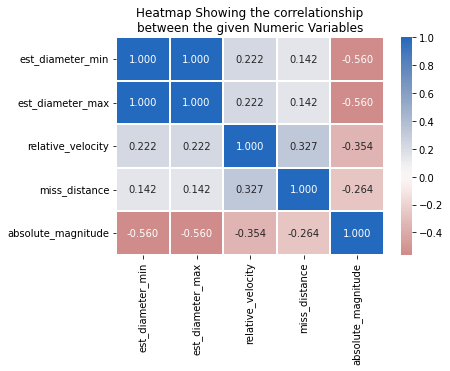

In [13]:
# Heatmap showing how the given numeric variables correlate with one another.
numeric_vars = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
sns.heatmap(data= nasa[numeric_vars].corr(), annot= True, fmt= '.3f', center= 0, cmap= 'vlag_r', linewidths= 0.2)
plt.title('Heatmap Showing the correlationship\nbetween the given Numeric Variables');

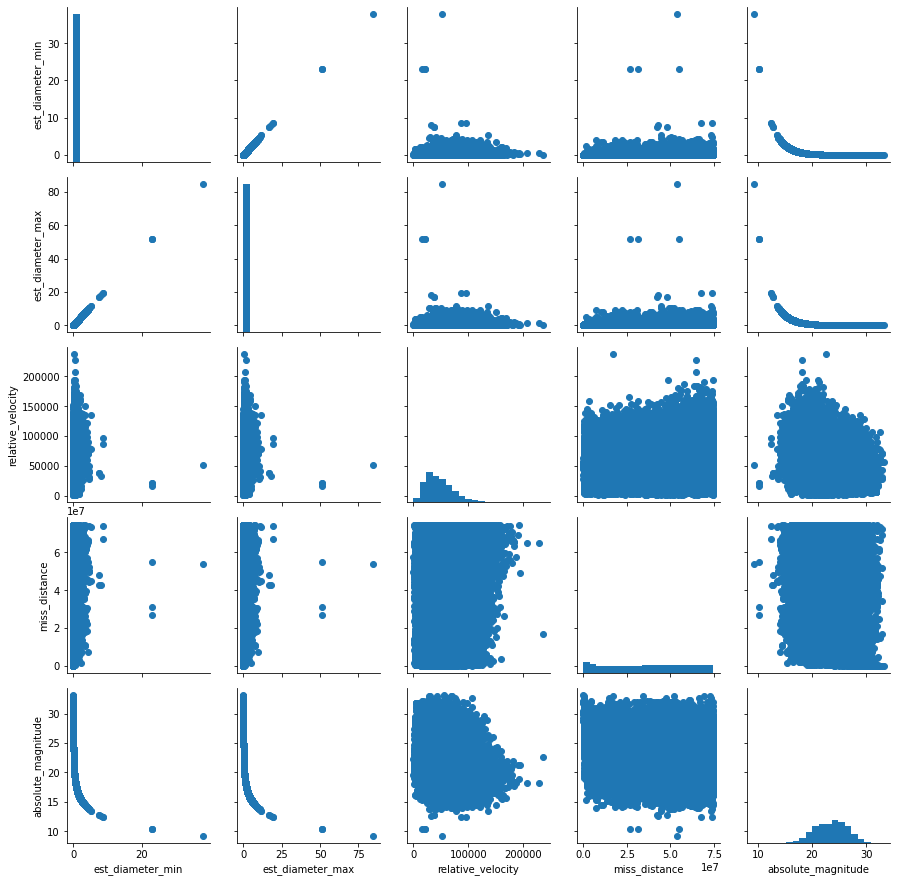

In [14]:
# A pairgrid showing the graphical correlation between the numeric variables given above.
g = sns.PairGrid(data= nasa, vars= numeric_vars)
g.map_diag(plt.hist, bins= 20)
g.map_offdiag(plt.scatter);

In [15]:
# Getting the of the biggest asteroid.
mask = nasa[(nasa.est_diameter_max == nasa.est_diameter_max.max())&(nasa.est_diameter_min == nasa.est_diameter_min.max())]
mask

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.89265,84.730541,51496.923293,5.372124e+07,9.23,False


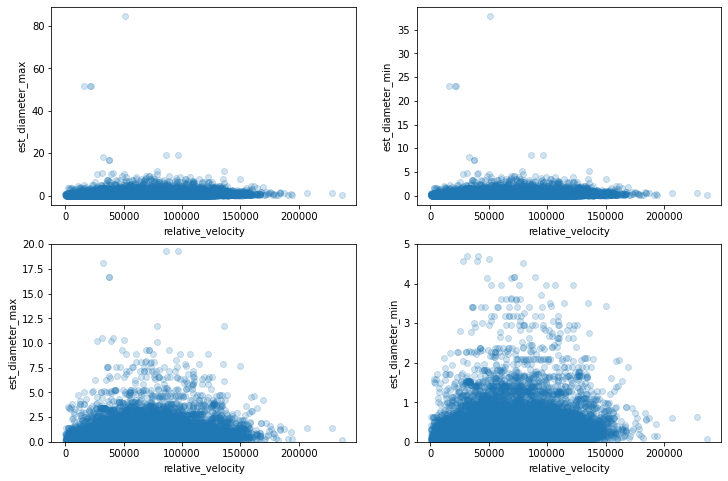

In [16]:
"""
Scatter plots showing the relationship between minimum and maximum estimated diameters with relative velocities
over different y limits.
"""
plt.figure(figsize= (12, 8))
plt.subplot(2, 2, 1)
sns.regplot(data= nasa, x= 'relative_velocity', y= 'est_diameter_max', fit_reg= False, scatter_kws= {'alpha' : 1/5})
# On reducing the y-limits.
plt.subplot(2, 2, 3)
sns.regplot(data= nasa, x= 'relative_velocity', y= 'est_diameter_max', fit_reg= False, scatter_kws= {'alpha' : 1/5})
plt.ylim(0, 20);

plt.subplot(2, 2, 2)
sns.regplot(data= nasa, x= 'relative_velocity', y= 'est_diameter_min', fit_reg= False, scatter_kws= {'alpha' : 1/5})
# On reducing the y-limits.
plt.subplot(2, 2, 4)
sns.regplot(data= nasa, x= 'relative_velocity', y= 'est_diameter_min', fit_reg= False, scatter_kws= {'alpha' : 1/5})
plt.ylim(0, 5);

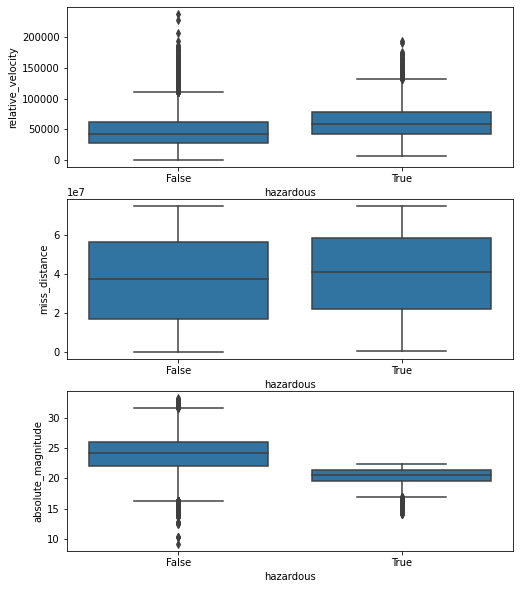

In [17]:
# Boxplots showing the relationships of various numeric variables and the hazardous effect.
fig, ax = plt.subplots(nrows= 3, figsize= (8, 10))
sns.boxplot(data= nasa, x= 'hazardous', y= 'relative_velocity', color= base_color, ax= ax[0]);
sns.boxplot(data= nasa, x= 'hazardous', y= 'miss_distance', color= base_color, ax= ax[1]);
sns.boxplot(data= nasa, x= 'hazardous', y= 'absolute_magnitude', color= base_color, ax= ax[2]);

## Multivariate Plot

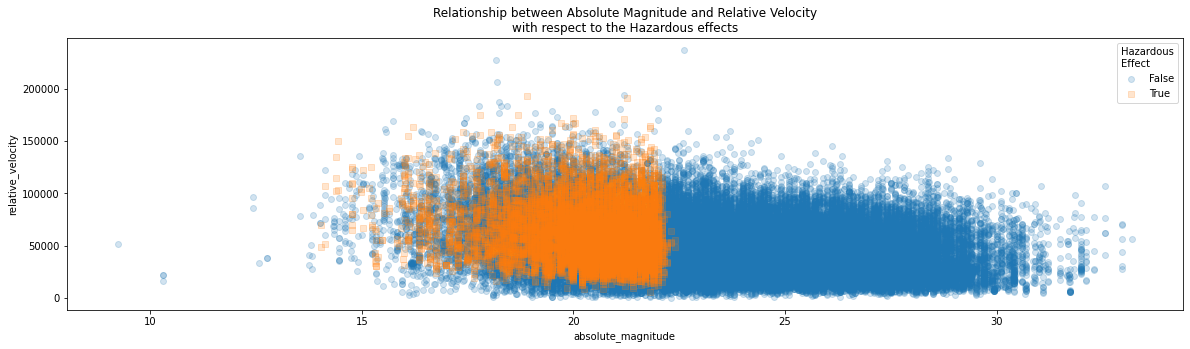

In [18]:
markers = [['False', 'o'], ['True', 's']]
plt.figure(figsize= (20, 5))

for cat, marker in markers:
    nasa_cat = nasa[nasa.hazardous == cat]
    sns.regplot(data= nasa_cat, x= 'absolute_magnitude', y= 'relative_velocity', marker= marker, fit_reg= False,
               scatter_kws= {'alpha' : 1/5})

plt.title('Relationship between Absolute Magnitude and Relative Velocity\nwith respect to the Hazardous effects')
plt.legend(['False', 'True'], title= 'Hazardous\nEffect');

In the plot above, all hazardous asteroids had an absolute magnitude below 22.5. However, most of those asteroids had a wide range in the relative velocities given though the majority of them had a relative velocity below 100,000.